In [1]:
# System Modules
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Module imports
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import seaborn 
import seaborn as sns
#import matplotplib 
import matplotlib.pyplot as plt
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.2f}".format

In [3]:
# Custom Modules
from scripts import file
from scripts.df_info import DataFrameInfo
from scripts.df_cleaning import DataFrameCleaning

In [4]:
file_name = 'Week1_challenge_data_source.csv'
data = file.read_csv(file_name)

# Information About The Data

In [5]:
df_info = DataFrameInfo(data)
df_info.info()

Data Frame contain 150001 rows and 55 columns


In [6]:
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

# Null Percentage

In [7]:
df_info.null_percentage()

Data Frame contain null values of 12.72%


In [8]:
df_info.get_null_counts()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Skewness of The DataFrame.
Skewness Tells us how the data is distributed.

In [9]:
df_info.skewness()

Bearer Id                                    0.03
Start ms                                     0.00
End ms                                      -0.00
Dur. (ms)                                    3.95
IMSI                                        41.05
MSISDN/Number                              332.16
IMEI                                         1.07
Avg RTT DL (ms)                             62.91
Avg RTT UL (ms)                             28.46
Avg Bearer TP DL (kbps)                      2.59
Avg Bearer TP UL (kbps)                      4.50
TCP DL Retrans. Vol (Bytes)                 15.95
TCP UL Retrans. Vol (Bytes)                 84.11
DL TP < 50 Kbps (%)                         -2.30
50 Kbps < DL TP < 250 Kbps (%)               3.27
250 Kbps < DL TP < 1 Mbps (%)                4.57
DL TP > 1 Mbps (%)                           5.37
UL TP < 10 Kbps (%)                         -8.99
10 Kbps < UL TP < 50 Kbps (%)               10.94
50 Kbps < UL TP < 300 Kbps (%)              21.88


## Data Cleaning

In [10]:
df_clean = DataFrameCleaning(data)

In [11]:
bad_columns = df_clean.get_column_with_many_null()
print("List Of Columns with More than 30% Null Values")
print(bad_columns)

List Of Columns with More than 30% Null Values
['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [12]:
## Remove Bad columns
df_clean.drop_columns(bad_columns)
#df_clean.drop_column('Dur. (ms)')

In [13]:
bad_columns = df_clean.get_column_with_many_null()
print("Number Of Columns with More than 30% Null Values After Clean Up")
print(bad_columns)

Number Of Columns with More than 30% Null Values After Clean Up
[]


# Handle Null Values

Remove rows with small null values

In [14]:
df_clean.drop_rows(['Bearer Id', 'MSISDN/Number'])

In [15]:
info = DataFrameInfo(df_clean.df)
info.get_null_counts()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


Fill Object Columns with mode

In [16]:
columns_object_type = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
df_clean.fill_catagorical_columns(columns_object_type)

In [17]:
info = DataFrameInfo(df_clean.df)
info.get_null_counts()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


Fill Other null columns with mode, Other columns don't have significance importance for future analysis but to keep things clean we need to save them with no null value

In [18]:
all_columns = df_clean.df.columns
df_clean.fill_catagorical_columns(all_columns)

In [19]:
info = DataFrameInfo(df_clean.df)
info.get_null_counts()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [20]:
df_clean.fix_outliers('Dur. (ms)')

In [21]:
info = DataFrameInfo(df_clean.df)
info.skewness()

Bearer Id                           0.02
Start ms                            0.00
End ms                             -0.00
Dur. (ms)                           0.81
IMSI                             -269.35
MSISDN/Number                     331.68
IMEI                                1.07
Avg RTT DL (ms)                    73.61
Avg RTT UL (ms)                    31.62
Avg Bearer TP DL (kbps)             2.59
Avg Bearer TP UL (kbps)             4.50
DL TP < 50 Kbps (%)                -2.31
50 Kbps < DL TP < 250 Kbps (%)      3.29
250 Kbps < DL TP < 1 Mbps (%)       4.59
DL TP > 1 Mbps (%)                  5.37
UL TP < 10 Kbps (%)                -9.02
10 Kbps < UL TP < 50 Kbps (%)      10.99
50 Kbps < UL TP < 300 Kbps (%)     21.91
UL TP > 300 Kbps (%)               36.19
Activity Duration DL (ms)           5.85
Activity Duration UL (ms)           7.36
Dur. (ms).1                         3.97
Nb of sec with Vol DL < 6250B       9.04
Nb of sec with Vol UL < 1250B       7.50
Social Media DL 

## Null percentage After data cleaning

In [22]:
info.null_percentage()

Data Frame contain null values of 0.0%


## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [23]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1578,133.20
1590,55.87
324,85.03
635,102.41
659,159.60


In [24]:
original_data[0].min(), original_data[0].max()

(0.026663470361961816, 1305.6273194294045)

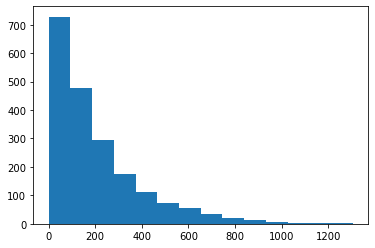

In [25]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

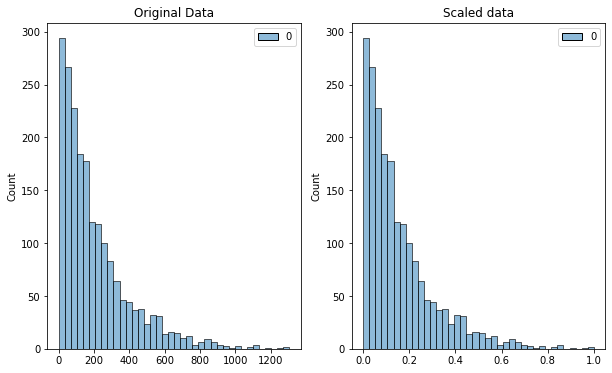

In [26]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

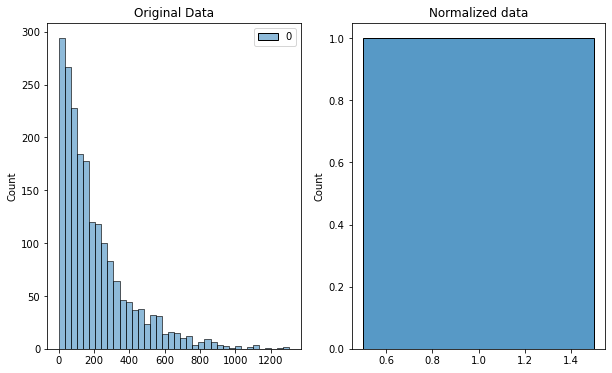

In [27]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [28]:
# check datatypes
info.info()

Data Frame contain 148506 rows and 45 columns


## Utility Functions

In [29]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

## Extracting Data

In [30]:
info = DataFrameInfo(df_clean.df)
info.get_null_counts()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [31]:
info.null_percentage()

Data Frame contain null values of 0.0%


## Exploration

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:


*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables





In [32]:
file_name = 'clean_telecommunication_data.csv'
dfExp = file.read_csv(file_name)
dfExp

,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,28.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,28.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,28.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148501,"13,042,425,979,329,300,480.00",4/29/2019 7:28,615.00,4/30/2019 0:01,407.00,"208,201,402,604,057.00","33,668,648,496.00","35,332,510,508,318.00",T85721A,313.00,9.00,"63,420.00","1,393.00",54.00,23.00,9.00,12.00,96.00,3.00,0.00,0.00,"3,380,381.00","2,355,730.00","59,5

In [33]:
dfExp.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         float64
Dur. (ms).1                       

### Univariate Analysis

This is mainly analysis done on particular variable only i.e we search for the data charecteristics of a variable with disregard to all the other columns

#### distributions

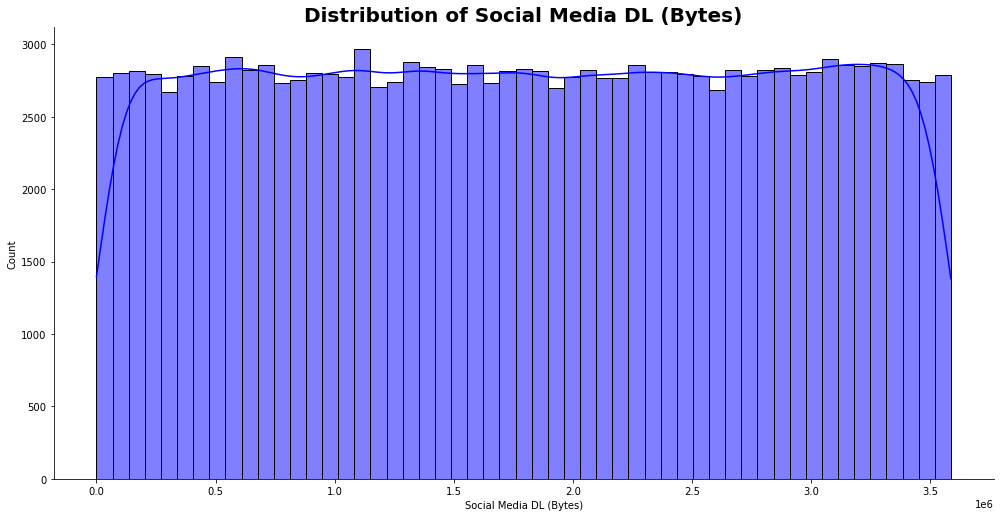

In [34]:
plot_hist(dfExp, "Social Media DL (Bytes)", "blue")

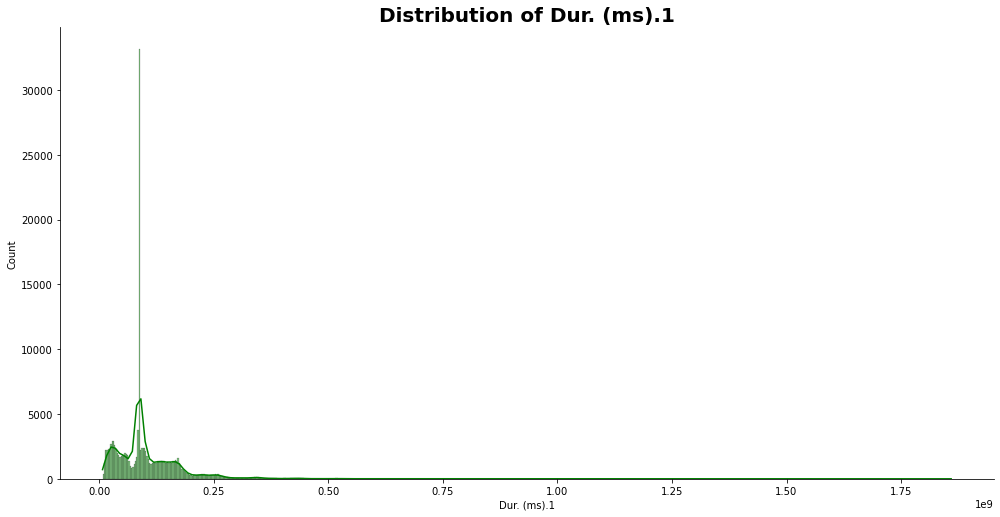

In [35]:
plot_hist(dfExp, "Dur. (ms).1", "green")

In [36]:
dfExp["Dur. (ms).1"].describe()

count         148,506.00
mean      105,084,600.60
std        81,072,729.72
min         7,142,988.00
25%        58,249,644.50
50%        86,399,986.00
75%       132,933,303.50
max     1,859,336,442.00
Name: Dur. (ms).1, dtype: float64

#### Outliers

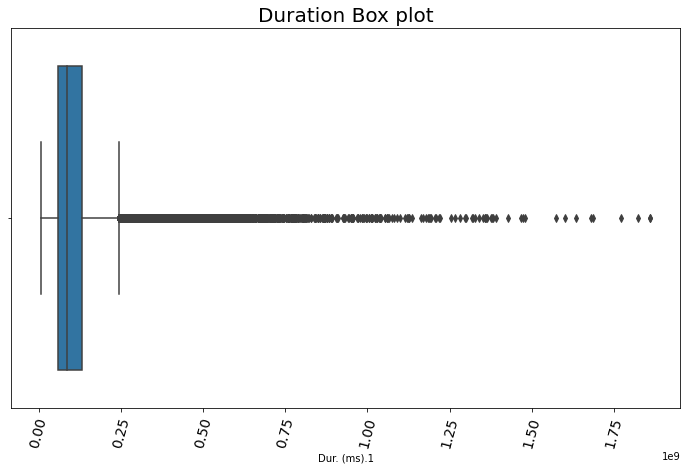

In [37]:
plot_box(dfExp,'Dur. (ms).1', 'Duration Box plot')

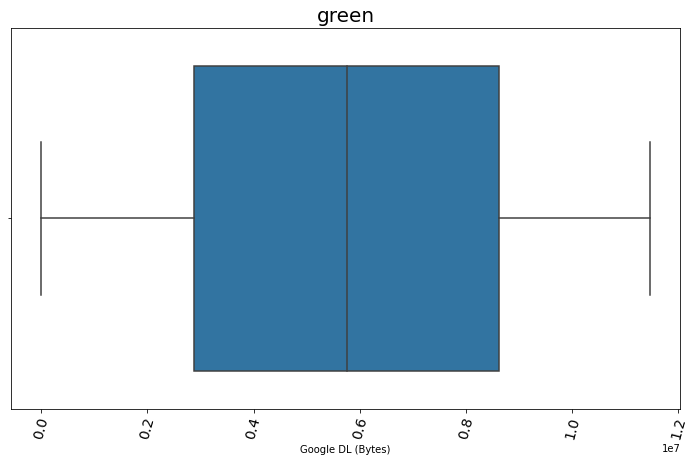

In [38]:
plot_box(dfExp,'Google DL (Bytes)', 'green')

In [ ]:
plot_box(dfExp, "Youtube DL (Bytes)", "number of youtube download")

In [ ]:
plot_hist(dfExp, "Netflix DL (Bytes)", "red")

In [ ]:
dfExp["Netflix DL (Bytes)"].describe()

#### categorical variables

In [ ]:
plot_count(dfExp, "Netflix DL (Bytes)","blue")

In [ ]:
plot_count(dfExp, "Gaming DL (Bytes)","greeen")

### Multivariate Analysis

This analysis that mainly done on two or more columns where we look for relationships between columns and how our data is distributed amoung values in multiple columns

#### scatter plots

In [ ]:
plot_scatter(dfExp.head(100), x_col="Gaming DL (Bytes)", y_col="Total Social Media" title="number of Gaming vs Total Social Media")

In [ ]:
plot_scatter(dfExp.head(100), x_col="Gaming DL (Bytes)", y_col="Total Social Media" title="number of Gaming vs Total Social Media")

#### Box Plots

In [ ]:
plot_box_multi(dfExp,  x_col="Gaming DL (Bytes)", y_col="Total Social Media" title="number of Gaming vs Total Social Media")

In [ ]:
plot_box_multi(dfExp,  x_col="Gaming DL (Bytes)", y_col="Total Social Media" title="number of Gaming vs Total Social Media")

#### pair plots

pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [ ]:
dfPair = dfExp[["Gaming DL (Bytes)", "Netflix DL (Bytes)", "Youtube DL (Bytes)", "Netflix DL (Bytes)", "Dur. (ms).1"]]

In [ ]:
sns.pairplot(dfPair, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

End